In [1]:
import os
import numpy as np
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
import string
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt


In [2]:
path_pos = "./data/pos/"
path_neg = "./data/neg/"

In [3]:
list_pos = os.listdir(path_pos)
list_neg = os.listdir(path_neg)

In [4]:
stemmer = PorterStemmer()

In [5]:
doc_pos=[]
doc_neg=[]

In [6]:
stop_words = stopwords.words("english")
stop_words.extend(list(string.punctuation))
stop_words = set(stop_words)

In [7]:
for p in list_pos:
    f = open(os.path.join(path_pos, p), 'r')
    lines = f.readlines()
    d=[]
    for l in lines:
        lw = wordpunct_tokenize(l)
        for w in lw:
            if w not in stop_words and not w.isnumeric():
                d.append(w)
    doc_pos.append(d)
    

In [8]:
for n in list_neg:
    f = open(os.path.join(path_neg, n), 'r')
    lines = f.readlines()
    d=[]
    for l in lines:
        lw = wordpunct_tokenize(l)    
        for w in lw:
            if w not in stop_words and not w.isnumeric():
                d.append(w)
    doc_neg.append(d)

In [9]:
(len(doc_neg),doc_neg[132]),(len(doc_pos),doc_pos[132])

((1000,
  ['showgirls',
   'first',
   'big',
   'budget',
   'big',
   'studio',
   'film',
   'receive',
   'nc',
   'rating',
   'release',
   'last',
   'year',
   'came',
   'time',
   'senator',
   'bob',
   'dole',
   'politicans',
   'chastised',
   'entertainment',
   'industry',
   'promoting',
   'sex',
   'violence',
   'showgirls',
   'indication',
   'hollywood',
   'future',
   'folks',
   'washington',
   'focus',
   'attack',
   'dangerous',
   'threat',
   'american',
   'values',
   '--',
   'bad',
   'moviemaking',
   'showgirls',
   'relentlessly',
   'exploitive',
   'look',
   'las',
   'vegas',
   'strip',
   'scene',
   'film',
   'turns',
   'trashy',
   'subject',
   'matter',
   'director',
   'paul',
   'verhoeven',
   'writer',
   'joe',
   'eszterhas',
   'collaborated',
   'another',
   'shock',
   'value',
   'project',
   'basic',
   'instinct',
   'follow',
   'plight',
   'young',
   'woman',
   'teen',
   'tv',
   'star',
   'elizabeth',
   'berkley

In [10]:
data = []
data = doc_pos.copy()
data.extend(doc_neg)

In [11]:
len(data)

2000

In [12]:
modelvec  = Word2Vec(sentences=data, min_count=1,vector_size= 200,workers=3, window =3, sg = 1)

In [13]:
modelvec.wv["feels"]

array([-7.65551180e-02, -6.35753497e-02, -6.20910414e-02,  9.83893201e-02,
        3.48679364e-01, -1.81306720e-01, -2.53075343e-02,  4.64614689e-01,
        8.78508091e-02, -1.44053134e-03, -1.11007147e-01, -7.03963041e-02,
        6.28345013e-02,  1.28215984e-01, -1.83649227e-01, -4.47295047e-02,
       -2.35413201e-02,  5.23432530e-02,  2.43938506e-01, -3.15536141e-01,
        2.42573097e-01, -1.95144951e-01,  8.86515379e-02, -1.40724510e-01,
        8.28676447e-02, -2.12673128e-01, -9.44242701e-02, -1.45547716e-02,
       -3.74727339e-01, -4.31014821e-02,  2.16154382e-01, -9.03692991e-02,
        2.81411737e-01, -1.58144996e-01,  1.83501616e-02, -4.95756939e-02,
        2.53103554e-01, -2.97240093e-02,  4.16301712e-02, -1.58292517e-01,
       -6.57064617e-02, -1.43567637e-01, -6.85982332e-02,  1.11405253e-01,
        2.22826689e-01, -3.40351999e-01, -3.19026142e-01, -2.20550328e-01,
        1.79712310e-01, -9.82572325e-03, -2.24100262e-01, -2.31795520e-01,
       -2.15540364e-01, -

******************************************

In [14]:
pos = []
neg = []

In [15]:
for d in doc_pos:
    p = np.zeros((200,))
    for w in d:
        p += modelvec.wv[w]
    pos.append(p/len(d))

In [16]:
for d in doc_neg:
    p = np.zeros((200,))
    for w in d:
        p += modelvec.wv[w]
    neg.append(p/len(d))

In [17]:
y_pos = np.ones((1000,))
y_neg = np.zeros((1000,))

In [18]:
X = np.concatenate([pos,neg],axis=0)
y = np.concatenate([y_pos,y_neg],axis=0)

X = (X - X.mean(axis=0))/(X.std(axis=0)+1e-7)

In [19]:
X.shape

(2000, 200)

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=43)

In [21]:
X_train.shape, y_train.shape    

((1600, 200), (1600,))

**********************************************

In [22]:
clf = LinearSVC(C=0.01)
clf.fit(X_train, y_train)

LinearSVC(C=0.01)

In [23]:
y = clf.predict(X_train)
np.sum((y == y_train))/y.shape[0]

0.788125

In [24]:
y = clf.predict(X_test)
np.sum((y == y_test))/y.shape[0]

0.7875

***********************************

In [25]:
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)

f:\aaaaaaaaaaa\Studying\4y2t\nlp\Labs\project\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y = clf2.predict(X_train)
np.sum((y == y_train))/y.shape[0]

0.811875

In [27]:
y = clf2.predict(X_test)
np.sum((y == y_test))/y.shape[0]

0.79

In [28]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [29]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [30]:
sum(explained_variance)

0.4073148985478023

In [31]:
clf2_ = LogisticRegression()
clf2_.fit(X_train, y_train)

LogisticRegression()

In [32]:
y = clf2_.predict(X_test)
np.sum((y == y_test))/y.shape[0]

0.54

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


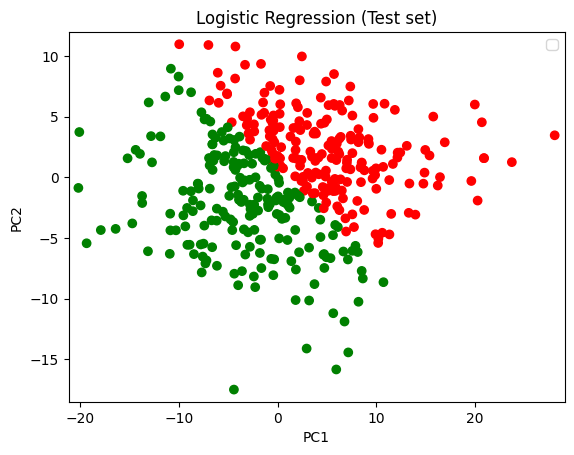

In [33]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

# plt.contourf(X1, X2, clf2.predict(np.array([X1.ravel(),
# 			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
# 			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# for i, j in enumerate(np.unique(y_set)):, label = j
plt.scatter(X_set[:, 0], X_set[:, 1],
			c = ListedColormap(('red', 'green'))(y_set))

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()
